**Digit Recognition using CNN** - Convolution Neural Network with MNIST Database

MNIST Database - (Modified National Institute of Standards and Technology database) is a large database of handwritten digits

In [81]:
#import required packages
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import np_utils

In [82]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


1.   **X_train, X_test** - contains the input images of the handwritten digits, its a input.

2.   **y_train, y_test** - contains the output label from the digit 0-9 for the corresponding images in X_train, X_test



(28, 28)

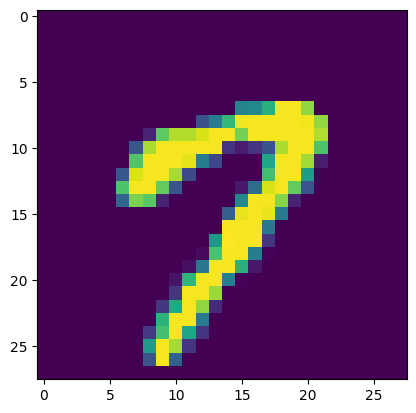

In [83]:
#let us visualize the data.

import matplotlib.pyplot as plt
num = 15
plt.imshow(X_train[num])
X_train[num].shape

In [84]:
# we can see the above output as 7 that will be present in the y_train[15]
print(y_train[num])

7


5


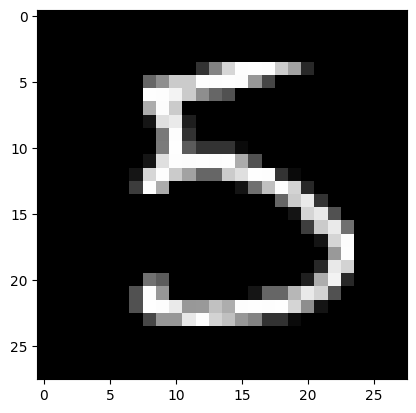

In [85]:
# same for the test images it will be used for the validation
plt.imshow(X_test[num], cmap=plt.get_cmap('gray'))
print(y_test[num])
#so we have the input image data with the corresponding output data

In [86]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#reshaping every images to 28x28x1 width, height= 28, 28 then 1 represent 1 channel if it is 3 then it will a color image rgb

if we print the X_train data directly we can see the **pixel value color** usually ranges from **0-255**


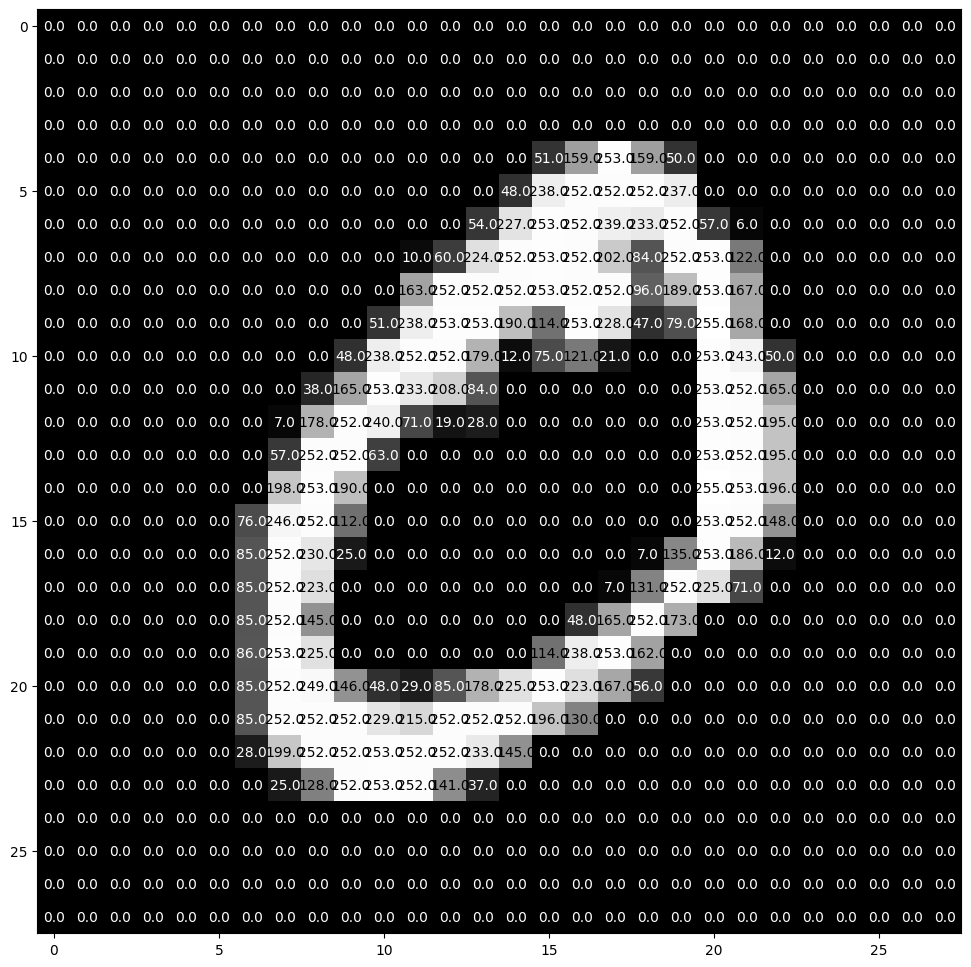

In [87]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[1].reshape(28,28), ax)
#now you can see the images with pixel ranging from 0 to 1 since we divided by 255.0

In [88]:
#let us check
X_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [89]:
print('shape i.e the dimension of the images', X_train[0].shape)
# 28 rows 28 columns in the data in range of pixel value 0-255

shape i.e the dimension of the images (28, 28, 1)


normalizing the data values by dividing with 255 to make in the range of 0-1
*   0 denotes complete black
*   1 denotes complete white



In [90]:
# it will be easily enhance the prediction through normalization by reducing the large values

X_train = X_train / 255
X_test = X_test / 255

In [91]:
print(X_train[0])
# now it will be in range of 0-255

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

### one hot encoding
*   It defines as list with correct output as 1 and rest of the classes with zero
*   Examples if the correct output class is 3, then one hot encoding will be
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] total size - 10
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



In [93]:
#let us do one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [94]:
#now

print(y_train[15])
# 1 in the 7th index

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [95]:
#total number of classes will be 10 i.e digit 0-9
num_classes = 10

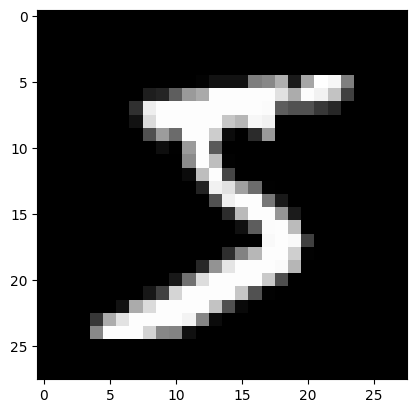

In [96]:
plt.imshow(X_train[0][:,:,0], cmap=plt.get_cmap('gray'))

# CNN Model
  ### CNN - Convolution Neural Network
  Convolution is the mathematical operation usually a matrix multiplication.<br>
  It used to extract the features from the input images<br>
  Matrix formed by sliding the filter over the image and computing the dot product called feature map
  

In [97]:
# defining CNN Model
def cnn():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [98]:
# build the model
model = cnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 40s - 134ms/step - accuracy: 0.9310 - loss: 0.2400 - val_accuracy: 0.9765 - val_loss: 0.0761
Epoch 2/10
300/300 - 33s - 110ms/step - accuracy: 0.9787 - loss: 0.0720 - val_accuracy: 0.9843 - val_loss: 0.0489
Epoch 3/10
300/300 - 41s - 137ms/step - accuracy: 0.9841 - loss: 0.0526 - val_accuracy: 0.9858 - val_loss: 0.0444
Epoch 4/10
300/300 - 41s - 137ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9866 - val_loss: 0.0391
Epoch 5/10
300/300 - 43s - 143ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 6/10
300/300 - 39s - 132ms/step - accuracy: 0.9911 - loss: 0.0283 - val_accuracy: 0.9887 - val_loss: 0.0345
Epoch 7/10
300/300 - 42s - 139ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9897 - val_loss: 0.0337
Epoch 8/10
300/300 - 40s - 135ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 9/10
300/300 - 32s - 108ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 

In [99]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.029634758830070496, 0.9908999800682068]

In [100]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[6.7519217e-09, 1.3572530e-09, 5.9523660e-07, 4.7556520e-07,
        1.0742833e-10, 1.0305663e-09, 4.4528224e-14, 9.9999595e-01,
        3.1063049e-08, 3.0048247e-06]], dtype=float32)

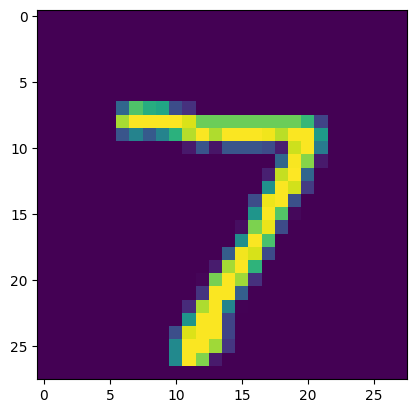

In [101]:
plt.imshow(X_test[0][:,:,0])

In [102]:
def expected_result(y_data):
  for i in range(10):
    if(y_data[i]):
      print(i)
      break

In [103]:
def predicted_result(pred_Xtrain, index):
  ans = pred_Xtrain[index].argsort()[-8:][::-1]  #sorting in descending
  print(ans[0])

In [104]:
pred_Xtest = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [107]:
index = 35
predicted_result(pred_Xtest, index)

2


In [108]:
expected_result(y_test[index])

2


In [109]:
model.save('./digitrecognition1.h5')
#save the model in the drive and download it for the deployment

In [110]:
test1 = X_test[0]

In [111]:
test1.shape

(28, 28, 1)

In [112]:
X_test.shape

(10000, 28, 28, 1)

In [113]:
test1 = test1.reshape(1, 28, 28, 1).astype('float32')
test1.shape

(1, 28, 28, 1)

In [114]:
model.predict(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[6.7519217e-09, 1.3572530e-09, 5.9523660e-07, 4.7556520e-07,
        1.0742833e-10, 1.0305663e-09, 4.4528224e-14, 9.9999595e-01,
        3.1063049e-08, 3.0048247e-06]], dtype=float32)

In [115]:
type(test1)

numpy.ndarray

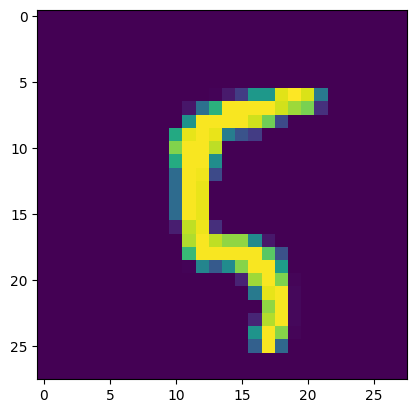

In [116]:
for i in range(0, 10):
  plt.imshow(X_train[100][:, :, 0])
